추가 회고: https://github.com/zzozzo/AIFFEL/blob/master/EXPLORATION/%5BE03%5Dface_sticker/README.md

In [21]:
#필요한 패키지 import
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


## 1. 이미지 불러오기

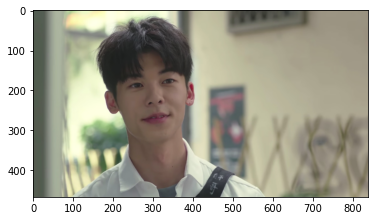

In [22]:
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/img1.png'
img_bgr = cv2.imread(my_image_path)    # 이미지 불러오기
img_show = img_bgr.copy() #출력용 이미지 저장해놓기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #이미지 색상 읽기 방식 변경하기
plt.imshow(img_rgb)
plt.show()

## 2. 랜드마크 찾기

bounding box location: rectangles[[(201, 139) (386, 325)]]


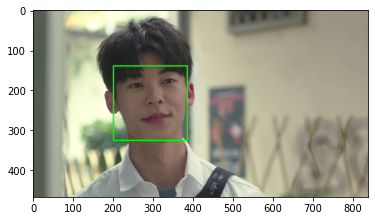

In [23]:
#detector 선언
detector_hog = dlib.get_frontal_face_detector()

#bounding box 추출하기
dlib_rects = detector_hog(img_rgb, 1)

#bounding box 위치 좌표
print("bounding box location:",dlib_rects)   

#bounding box 그리기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [24]:
#랜드마크 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#얼굴에서 찾은 랜드마크 좌표 저장할 리스트
list_landmarks = []

#얼굴에서 랜드마크 포인트 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    #찾은 랜드마크 리스트에 저장하기
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


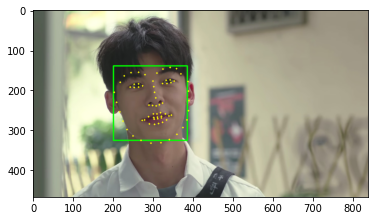

In [25]:
#랜드마크 출력하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 크기 및 위치 설정

In [26]:
#코 위치 찾기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
   print (landmark[33]) 
   x = landmark[33][0]
   y = landmark[33][1]
   w = h = dlib_rect.width()
   print ('(x,y) : (%d,%d)'%(x,y))
   print ('(w,h) : (%d,%d)'%(w,h))

(308, 239)
(x,y) : (308,239)
(w,h) : (186,186)


(186, 186, 3)


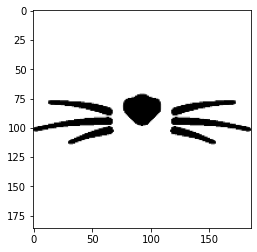

In [27]:
#스티커 불러오기
sticker_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/cat.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

img_show = img_sticker.copy()
img_show_cat = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_cat)
plt.show()

In [28]:
#원본이미지 top-left 방식으로 좌표계 변환
refined_x = x - w // 2
refined_y = y - h // 2

#스티커가 원본영역 넘어가는 경우 사이즈 조정
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (215,146)


## 스티커 있는 사진 출력하기

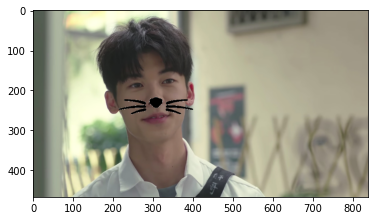

In [29]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 동일 이미지 다른 조건에 적용해보기

### 1. 얼굴 부분만 잘랐을 때
__step1. haarcascade 사용해 얼굴부위 인식해 자름

In [30]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/img1.png'

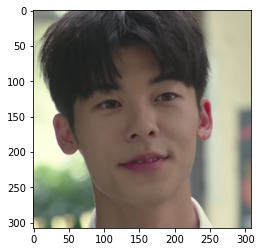

In [31]:
#얼굴 크롭하기
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img_re = cv2.imread(my_image_path)
img_rgb_re = cv2.cvtColor(img_re, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(img_rgb_re, 1.3,5)

for (x,y,w,h) in faces:
    cropped = img_re[y - int(h/4):y + h + int(h/4), x - int(w/4):x + w + int(w/4)]
    cv2.imwrite("cropped.png", cropped)

plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.show()    

__step2. 크롭한 얼굴 불러와 랜드마크 추출

In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [42]:
my_image_path1 = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/cropped.png'
img_cr = cv2.imread(my_image_path1)
img_show_cr = img_cr.copy()
img_rgb = cv2.cvtColor(img_cr, cv2.COLOR_BGR2RGB)

bounding box location: rectangles[[(56, 77) (242, 263)]]


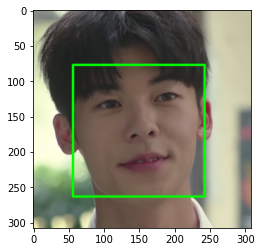

In [44]:
#detector 선언
detector_hog = dlib.get_frontal_face_detector()

#bounding box 추출하기
dlib_rects = detector_hog(img_rgb, 1)

#bounding box 위치 좌표
print("bounding box location:",dlib_rects)   

#bounding box 그리기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show_cr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show_cr, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [35]:
img_cr = cv2.imread(my_image_path1)
img_show_cr = img_cr.copy()

#랜드마크 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#얼굴에서 찾은 랜드마크 좌표 저장할 리스트
list_landmarks = []

#얼굴에서 랜드마크 포인트 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    #찾은 랜드마크 리스트에 저장하기
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


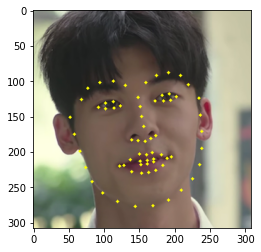

In [36]:
#랜드마크 출력하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show_cr, point, 2, (0, 255, 255), -1)

img_rgb_cr = cv2.cvtColor(img_show_cr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_cr)
plt.show()

__step3. 스티커 위치 및 크기 조정 후 적용

In [37]:
#코 위치 찾기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
   print (landmark[33]) 
   x = landmark[33][0]
   y = landmark[33][1]
   w = h = dlib_rect.width()
   print ('(x,y) : (%d,%d)'%(x,y))
   print ('(w,h) : (%d,%d)'%(w,h))

(158, 185)
(x,y) : (158,185)
(w,h) : (187,187)


In [38]:
sticker_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/cat.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(187, 187, 3)


(x,y) : (65,92)


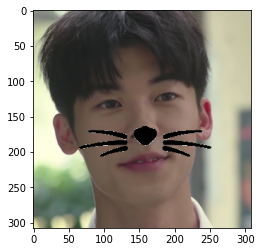

In [39]:
#원본이미지 top-left 방식으로 좌표계 변환
refined_x = x - w // 2
refined_y = y - h // 2

#스티커가 원본영역 넘어가는 경우 사이즈 조정
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_cr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_cr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_cr, cv2.COLOR_BGR2RGB))
plt.show()

얼굴 부분만 자른 사진으로 했더니 ~~더 귀여워졌따...(사망)~~ 큰 사진에서 볼 때보다 어떤 부위에 스티커가 적용되는지 잘 볼 수 있었다.   
크게 바뀐 것은 없는 것 같다.

### 2. 90도 회전 했을 때
90도 회전한 경우에 랜드마크가 감지되는지 궁금해서 작동시켰다.   
오른쪽만 구현하며, 왼쪽의 경우도 같은 경우라 가정하였다.

In [53]:
#필요한 패키지 import
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

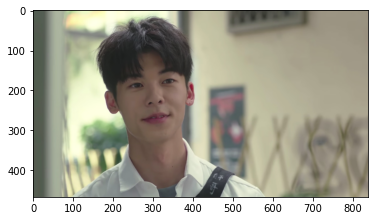

In [54]:
#이미지 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/img1.png'
img_bgr = cv2.imread(my_image_path)    # 이미지 불러오기
img_show = img_bgr.copy() #출력용 이미지 저장해놓기

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


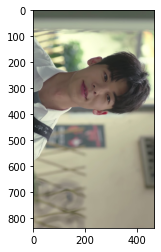

In [61]:
#이미지 오른쪽으로 90도 회전하기
img90 = cv2.rotate(img_bgr, cv2.ROTATE_90_CLOCKWISE)
img_rgb = cv2.cvtColor(img90, cv2.COLOR_BGR2RGB)
img_show = img90.copy() 
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

bounding box location: rectangles[]


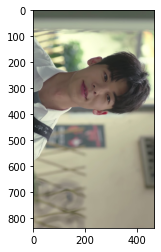

In [63]:
#detector 선언
detector_hog = dlib.get_frontal_face_detector()

#bounding box 추출하기
dlib_rects = detector_hog(img_rgb, 1)

#bounding box 위치 좌표
print("bounding box location:",dlib_rects)   

#bounding box 그리기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show_cr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

회전한 사진은 인식하지 못한다. 즉, 90도처럼 각도가 서 있는 사람 같지 않으면 인식이 안된다는 뜻!

## 다른 조건에 적용해보기

### 1. 얼굴에 일부분만 빛이 강할 때

In [64]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/1.jpg'

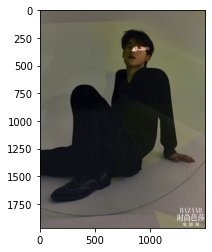

In [65]:
img_bgr = cv2.imread(my_image_path)    # 이미지 불러오기
img_show = img_bgr.copy() #출력용 이미지 저장해놓기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #이미지 색상 읽기 방식 변경하기
plt.imshow(img_rgb)
plt.show()

bounding box location: rectangles[]


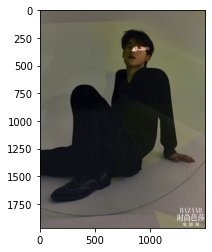

In [66]:
#detector 선언
detector_hog = dlib.get_frontal_face_detector()

#bounding box 추출하기
dlib_rects = detector_hog(img_rgb, 1)

#bounding box 위치 좌표
print("bounding box location:",dlib_rects)   

#bounding box 그리기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show_cr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

빛이 얼굴 일부분에만 강할 때 인식이 되지 않아 HOG feature를 출력해보았다.

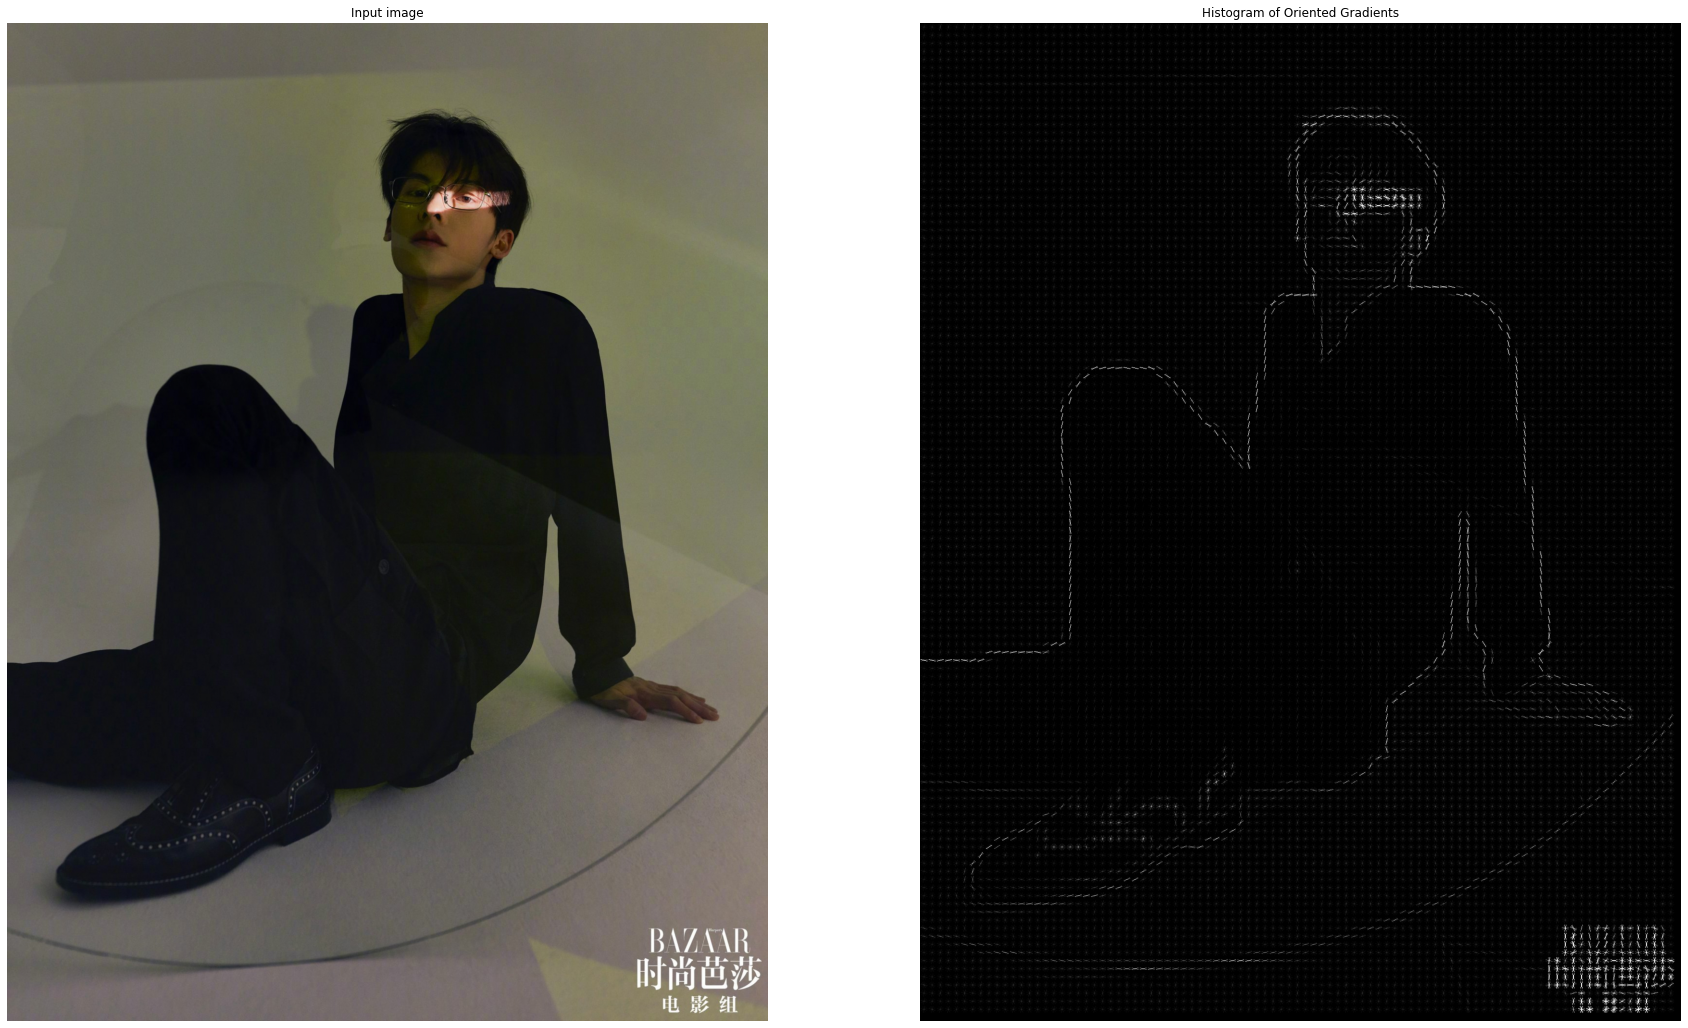

In [67]:
import matplotlib.pyplot as plt
import os
import cv2

from skimage.feature import hog
from skimage import exposure

my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/1.jpg'
image = cv2.imread(my_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 20), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

확실히 얼굴 쪽에 있는 그레디언트들이 얼굴 형태를 그리지 못한다. HOG 논문에서 그레디언트는 밝기에 민감한, 즉, 밝기에 따라 그레디언트 값이 달라져 코드 실행 결과에도 영향을 미칠 수 있고, 이를 완벽히 제거하지 못한다고 하였다. 그래서 얼굴 한 쪽에만 빛이 강할 경우 얼굴 감지가 안되는 것과 연결되지 않을까 추측하였다.

### 2. 측면사진

In [73]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/2.jpeg'

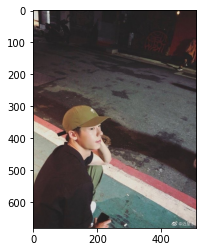

In [74]:
img_bgr = cv2.imread(my_image_path)    # 이미지 불러오기
img_show = img_bgr.copy() #출력용 이미지 저장해놓기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #이미지 색상 읽기 방식 변경하기
plt.imshow(img_rgb)
plt.show()

bounding box location: rectangles[]


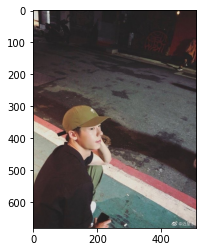

In [75]:
#detector 선언
detector_hog = dlib.get_frontal_face_detector()

#bounding box 추출하기
dlib_rects = detector_hog(img_rgb, 1)

#bounding box 위치 좌표
print("bounding box location:",dlib_rects)   

#bounding box 그리기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show_cr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

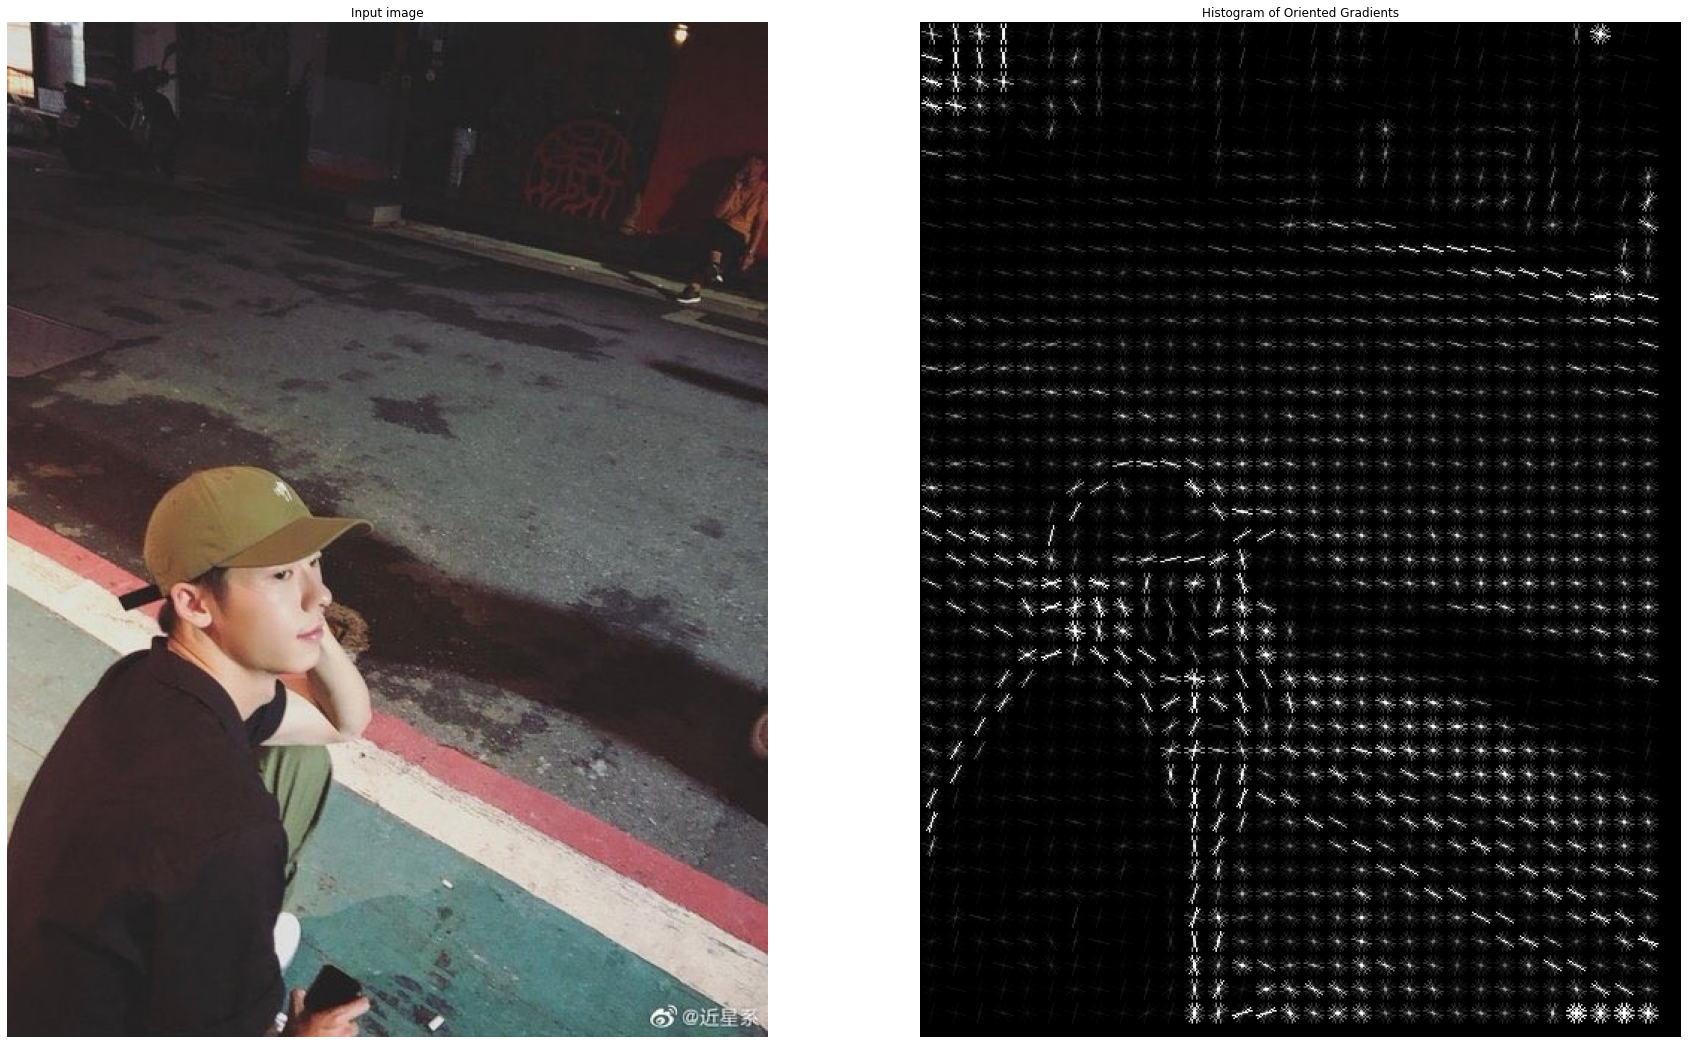

In [78]:
import matplotlib.pyplot as plt
import os
import cv2

from skimage.feature import hog
from skimage import exposure

my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/2.jpeg'
image = cv2.imread(my_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 20), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Descriptor가 얼굴을 감지하지 못해서 HOG feature 출력해봤더니 확실히 얼굴 형태가 잘 보이지 않는 것 같다.얼굴 주위로 모자, 팔, 차선 등이 있어 얼굴 인식에 방해가 되는 것 같기도 하다.

### 3. 턱 손으로 가릴 때

In [91]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [92]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/4.jpeg'

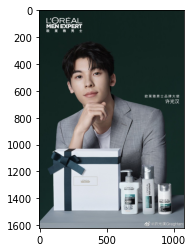

In [93]:
img_bgr = cv2.imread(my_image_path)    # 이미지 불러오기
img_show = img_bgr.copy() #출력용 이미지 저장해놓기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #이미지 색상 읽기 방식 변경하기
plt.imshow(img_rgb)
plt.show()

bounding box location: rectangles[[(230, 409) (498, 676)]]


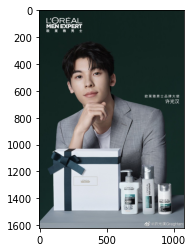

In [94]:
#detector 선언
detector_hog = dlib.get_frontal_face_detector()

#bounding box 추출하기
dlib_rects = detector_hog(img_rgb, 1)

#bounding box 위치 좌표
print("bounding box location:",dlib_rects)   

#bounding box 그리기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show_cr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [97]:
#랜드마크 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#얼굴에서 찾은 랜드마크 좌표 저장할 리스트
list_landmarks = []

#얼굴에서 랜드마크 포인트 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    #찾은 랜드마크 리스트에 저장하기
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


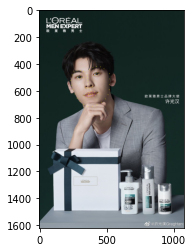

In [98]:
#랜드마크 출력하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [99]:
#코 위치 찾기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
   print (landmark[33]) 
   x = landmark[33][0]
   y = landmark[33][1]
   w = h = dlib_rect.width()
   print ('(x,y) : (%d,%d)'%(x,y))
   print ('(w,h) : (%d,%d)'%(w,h))

(373, 579)
(x,y) : (373,579)
(w,h) : (269,269)


In [103]:
sticker_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/cat.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(269, 269, 3)


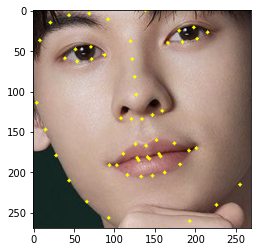

In [104]:
#스티커 적용될 영역 확인 -> 너무 작아서 확대 한 번해보기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0],refined_x:refined_x+img_sticker.shape[1]]
plt.imshow(cv2.cvtColor(sticker_area, cv2.COLOR_BGR2RGB))

(x,y) : (239,445)


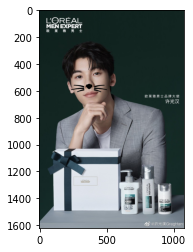

In [102]:
#원본이미지 top-left 방식으로 좌표계 변환
refined_x = x - w // 2
refined_y = y - h // 2

#스티커가 원본영역 넘어가는 경우 사이즈 조정
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

사진과 같은 가린 정도는 인식이 가능한 것으로 보인다.

## 4. 마스크 착용

In [105]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/6.jpg'

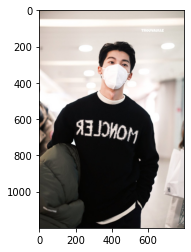

In [106]:
img_bgr = cv2.imread(my_image_path)    # 이미지 불러오기
img_show = img_bgr.copy() #출력용 이미지 저장해놓기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #이미지 색상 읽기 방식 변경하기
plt.imshow(img_rgb)
plt.show()

bounding box location: rectangles[]


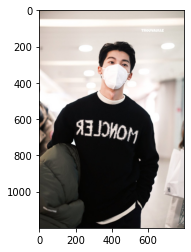

In [107]:
#detector 선언
detector_hog = dlib.get_frontal_face_detector()

#bounding box 추출하기
dlib_rects = detector_hog(img_rgb, 1)

#bounding box 위치 좌표
print("bounding box location:",dlib_rects)   

#bounding box 그리기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show_cr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

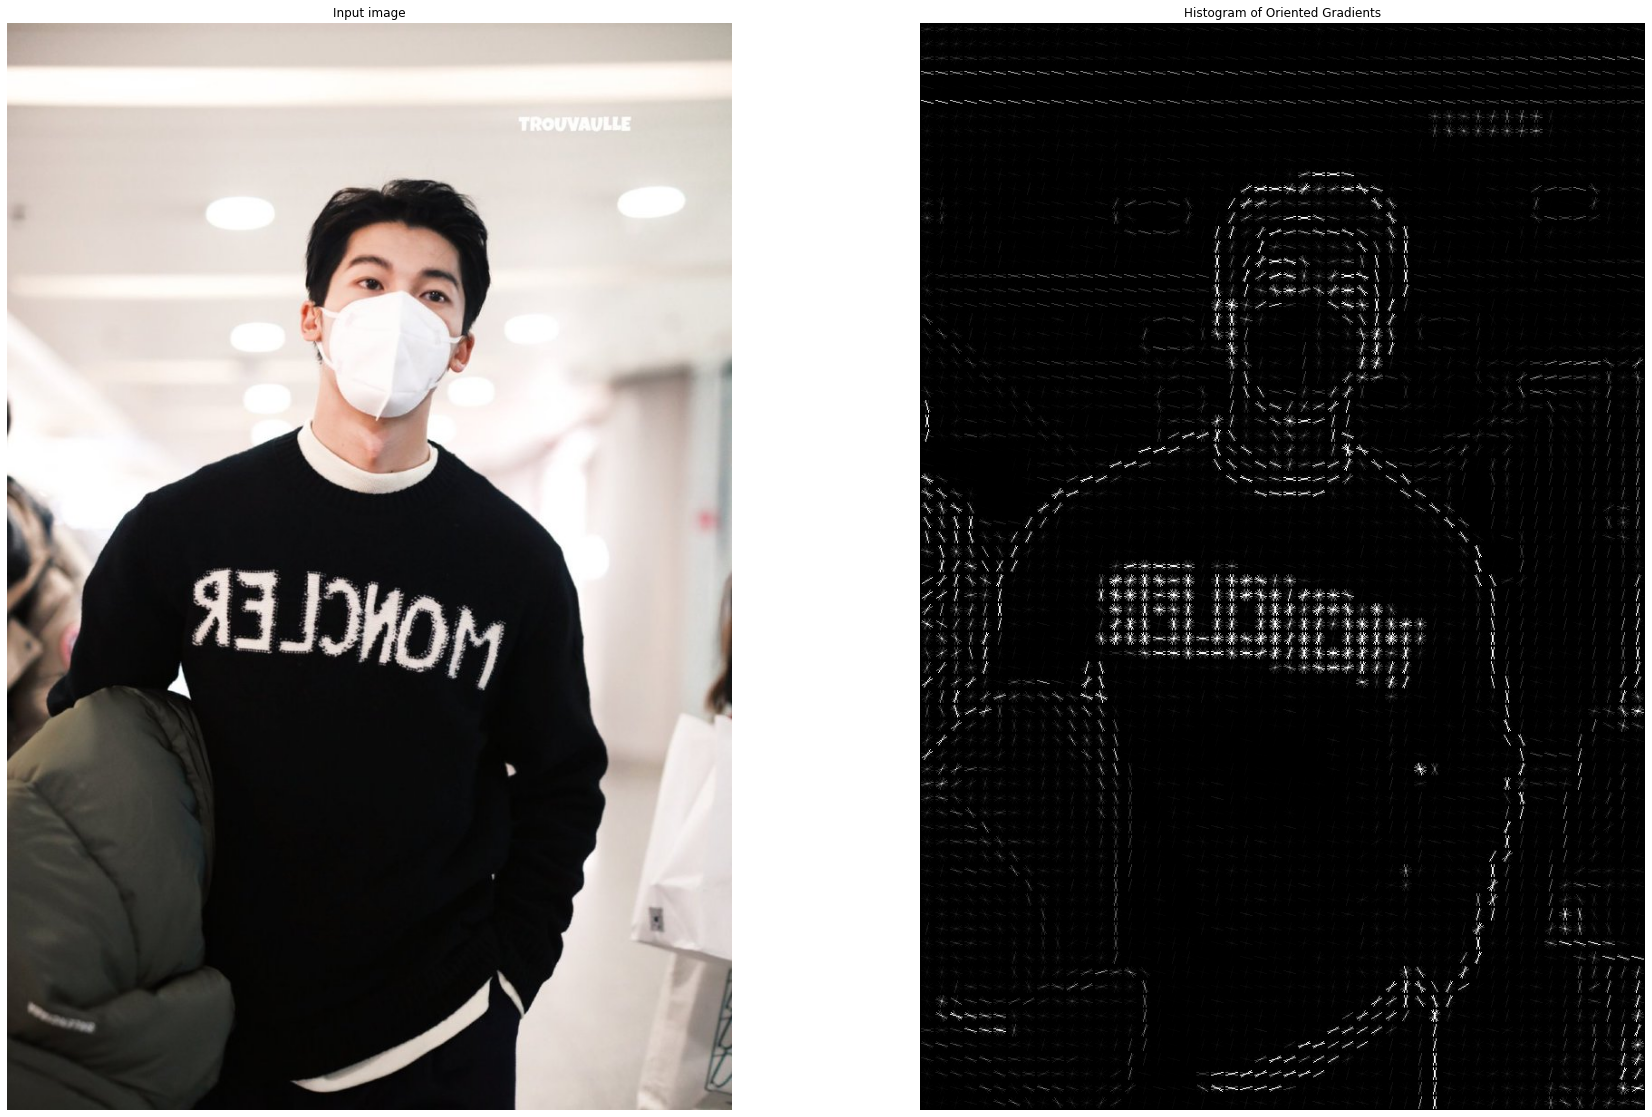

In [108]:
import matplotlib.pyplot as plt
import os
import cv2

from skimage.feature import hog
from skimage import exposure

my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/6.jpg'
image = cv2.imread(my_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 20), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

요즘 카메라 어플에서 스티커를 사용할 때 마스크를 착용해도 얼굴이 인식 되어서 HOG로도 얼굴이 감지되는지 궁금했다. 하지만 마스크를 착용한 부분에서 코와 입 모양이 그려지지 않는 것을 볼 수 있다. 그래서 마스크 착용 후 사용할 수 있는 애플리케이션은 인공지능을 활용해 마스크 착용 여부를 학습시키는 것 같다.

## 5. 전신+원거리

In [124]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [125]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/7.jpg'

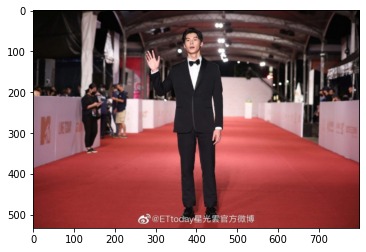

In [126]:
img_bgr = cv2.imread(my_image_path)    # 이미지 불러오기
img_show = img_bgr.copy() #출력용 이미지 저장해놓기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #이미지 색상 읽기 방식 변경하기
plt.imshow(img_rgb)
plt.show()

bounding box location: rectangles[[(369, 62) (405, 98)]]


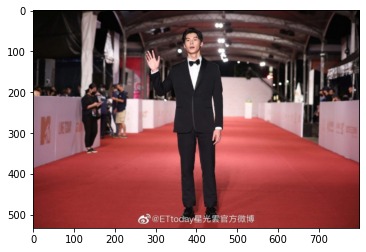

In [127]:
#detector 선언
detector_hog = dlib.get_frontal_face_detector()

#bounding box 추출하기
dlib_rects = detector_hog(img_rgb, 1)

#bounding box 위치 좌표
print("bounding box location:",dlib_rects)   

#bounding box 그리기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show_cr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [128]:
#랜드마크 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#얼굴에서 찾은 랜드마크 좌표 저장할 리스트
list_landmarks = []

#얼굴에서 랜드마크 포인트 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    #찾은 랜드마크 리스트에 저장하기
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


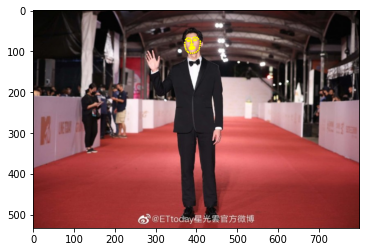

In [129]:
#랜드마크 출력하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [130]:
#코 위치 찾기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
   print (landmark[33]) 
   x = landmark[33][0]
   y = landmark[33][1]
   w = h = dlib_rect.width()
   print ('(x,y) : (%d,%d)'%(x,y))
   print ('(w,h) : (%d,%d)'%(w,h))

(388, 84)
(x,y) : (388,84)
(w,h) : (37,37)


(37, 37, 3)


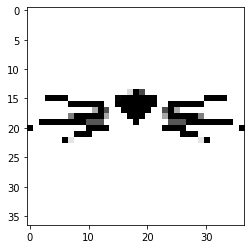

In [131]:
#스티커 불러오기
sticker_path = os.getenv('HOME')+'/aiffel/AIFFEL/EXPLORATION/[E03]face_sticker/cat.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

img_show = img_sticker.copy()
img_show_cat = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_cat)
plt.show()

In [132]:
#원본이미지 top-left 방식으로 좌표계 변환
refined_x = x - w // 2
refined_y = y - h // 2

#스티커가 원본영역 넘어가는 경우 사이즈 조정
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (370,66)


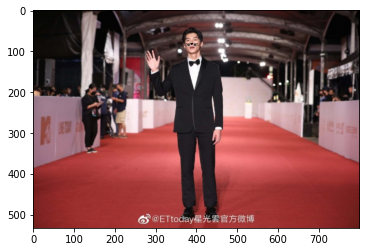

In [134]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

이정도 원거리와 전신 사진에서 얼굴 찾기가 가능한 것 같다.